Tugas Praktikum Mechine Learning Pertemuan 6

Nama: Irma Rohmatillah

NIM: 1227050060

In [3]:
# %%
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# %%
# Load dataset diabetes
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# %%
# Lihat statistik deskriptif
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


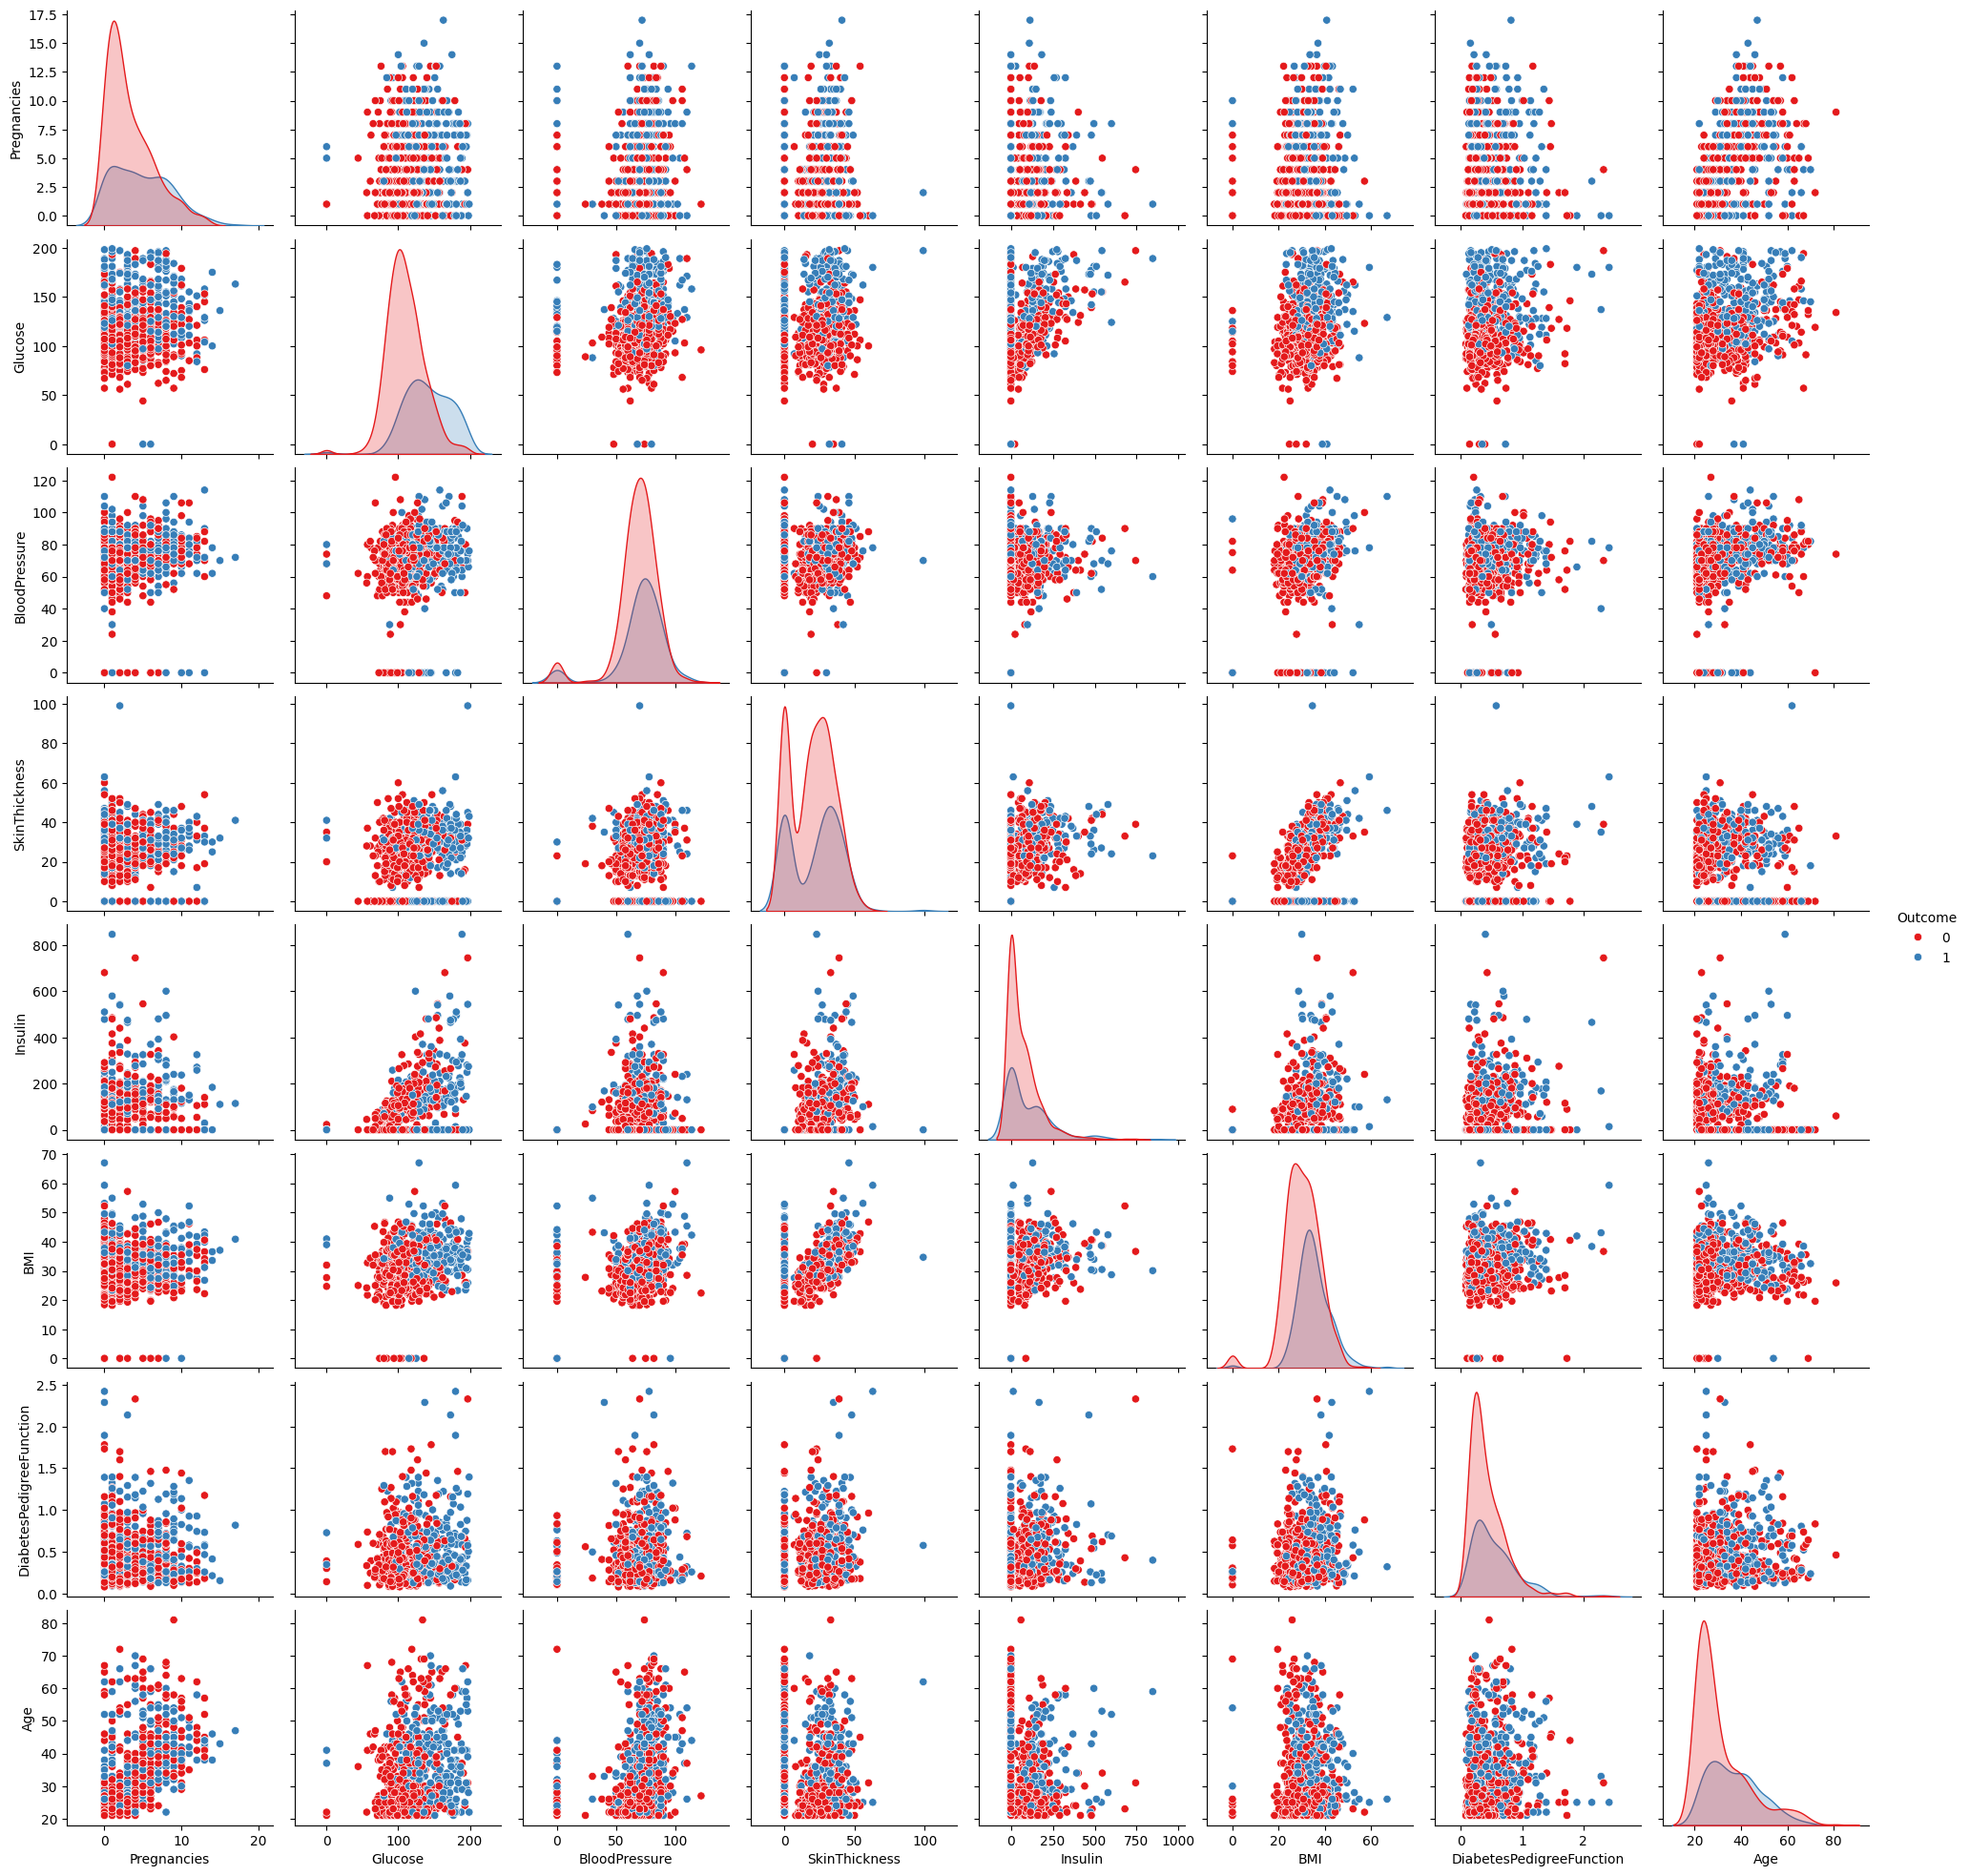

In [6]:
# %%
# Visualisasi pairplot
sns.pairplot(df, hue='Outcome', palette='Set1')


In [7]:
# %%
x = df.drop('Outcome', axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

print("Jumlah data training:", len(x_train))
print("Jumlah data testing:", len(x_test))


Jumlah data training: 537
Jumlah data testing: 231


In [8]:
# %%
# Gunakan DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')  # Bisa juga pakai 'gini'
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [9]:
# %%
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.80      0.77       144
           1       0.62      0.54      0.58        87

    accuracy                           0.70       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



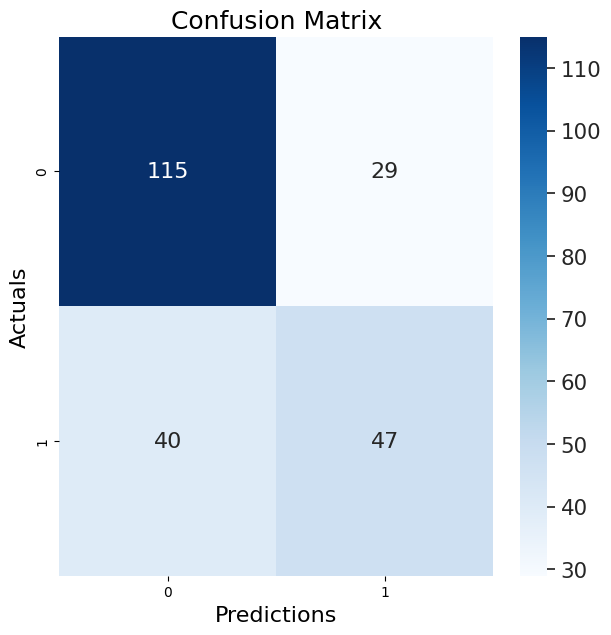

In [10]:
# %%
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', annot_kws={"size": 16})

plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


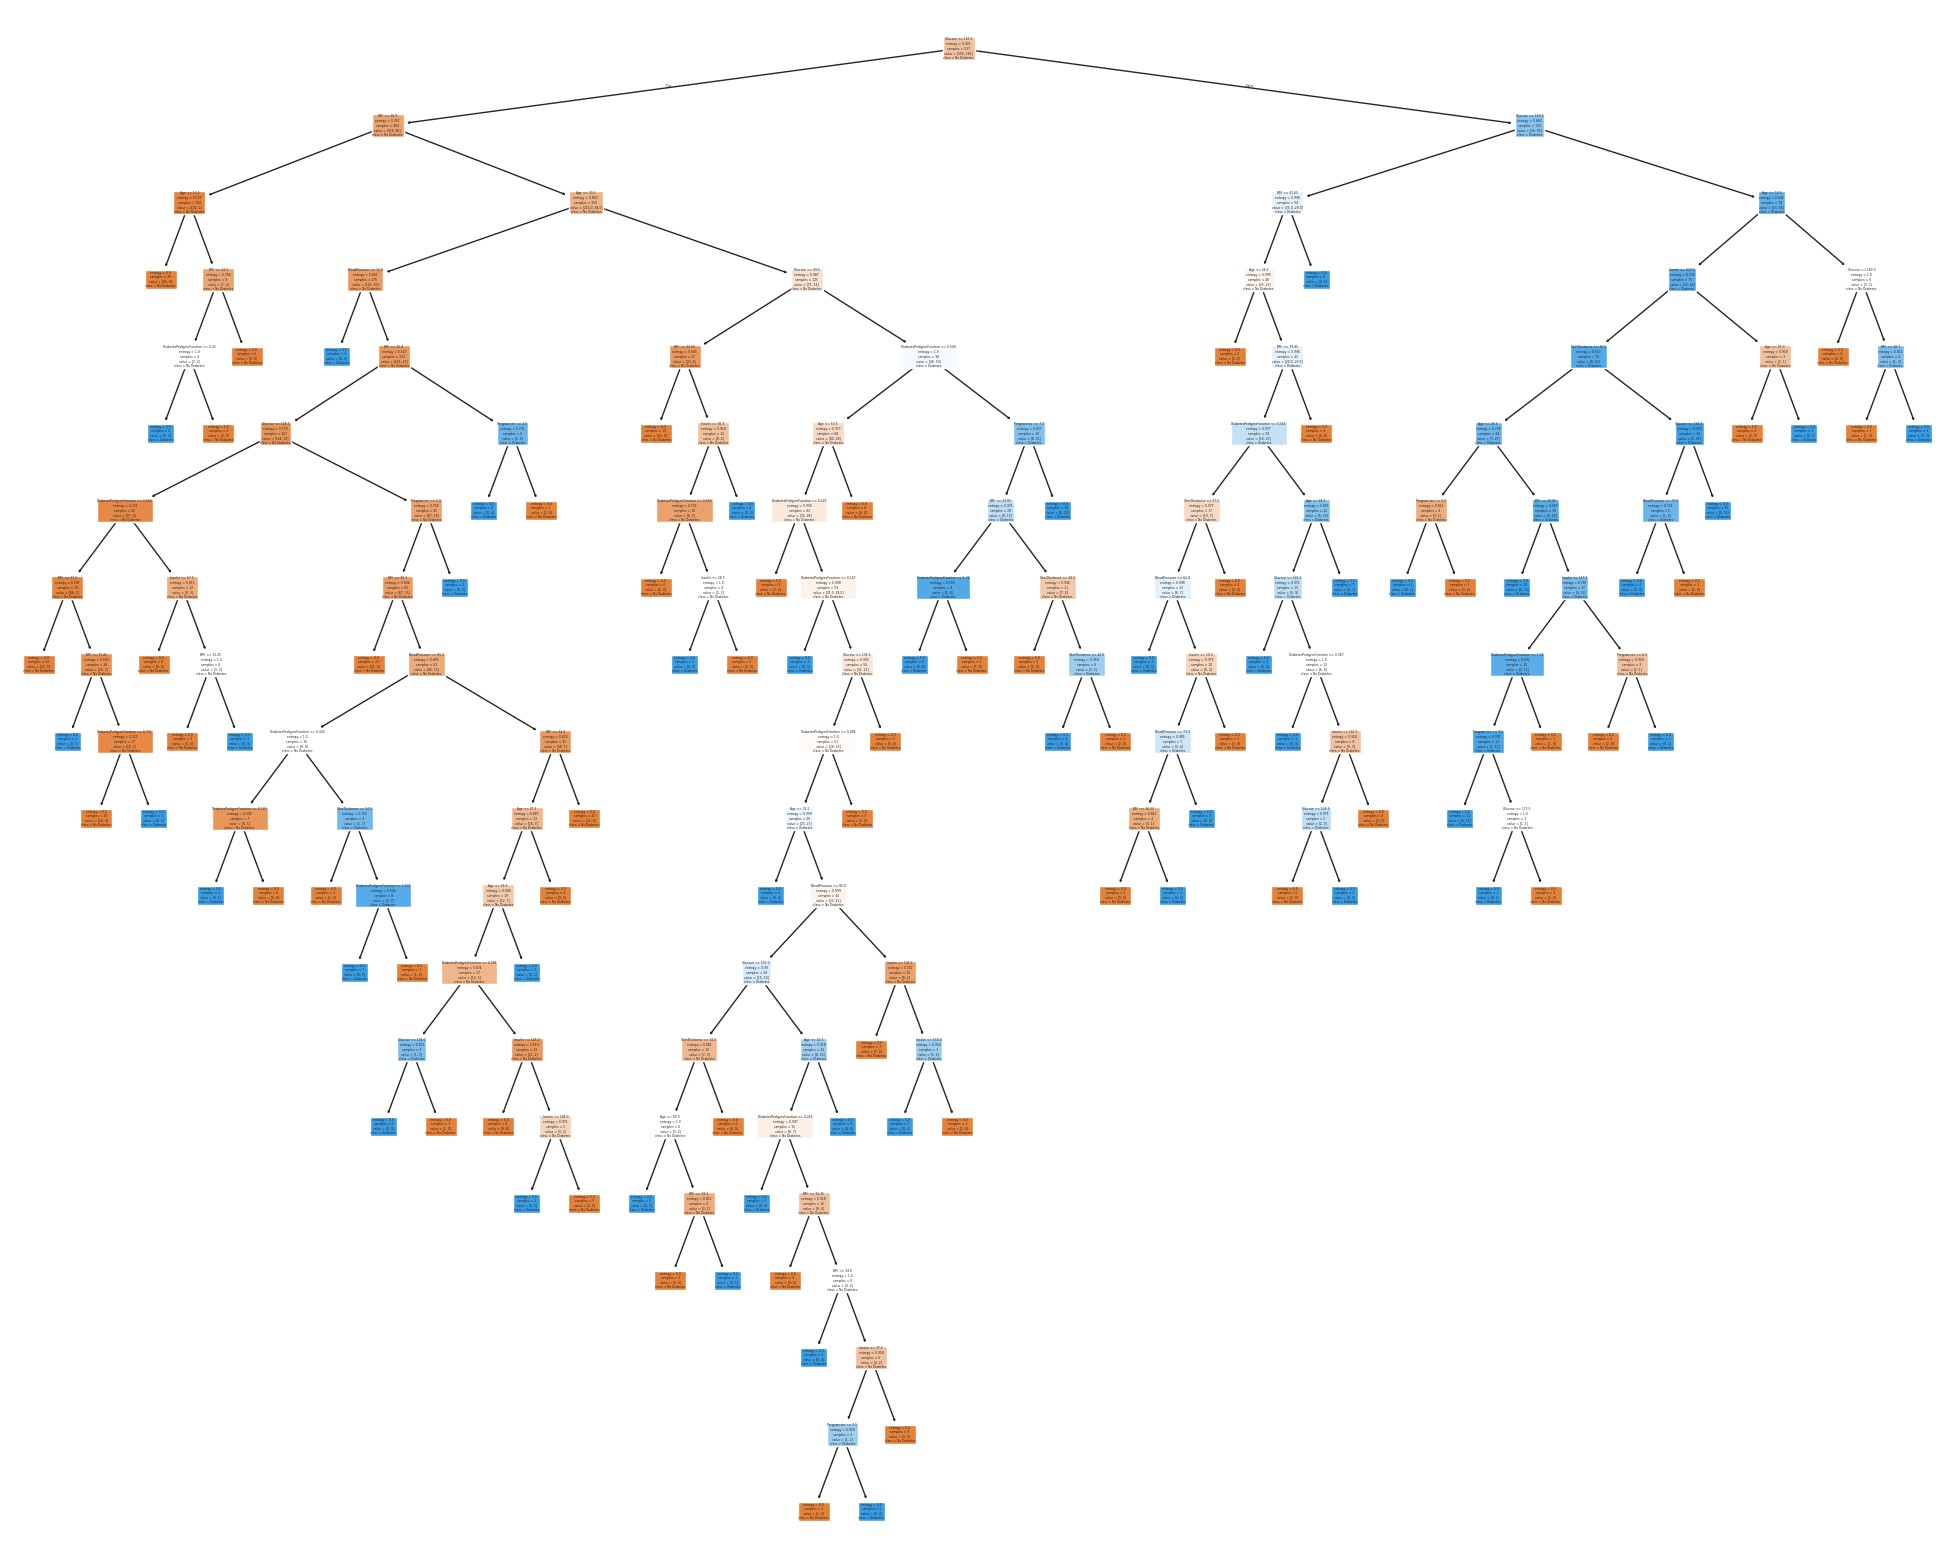

In [11]:
# %%
features = x.columns.tolist()

fig, ax = plt.subplots(figsize=(25,20))
tree.plot_tree(model, feature_names=features, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()


In [12]:
# %%
# Contoh data baru
new_data = {
    'Pregnancies': 2,
    'Glucose': 120,
    'BloodPressure': 70,
    'SkinThickness': 20,
    'Insulin': 79,
    'BMI': 25.0,
    'DiabetesPedigreeFunction': 0.35,
    'Age': 33
}

# Ubah ke DataFrame
input_df = pd.DataFrame([new_data])
prediction = model.predict(input_df)
print("Hasil Prediksi:", "Diabetes" if prediction[0]==1 else "Tidak Diabetes")


Hasil Prediksi: Tidak Diabetes
